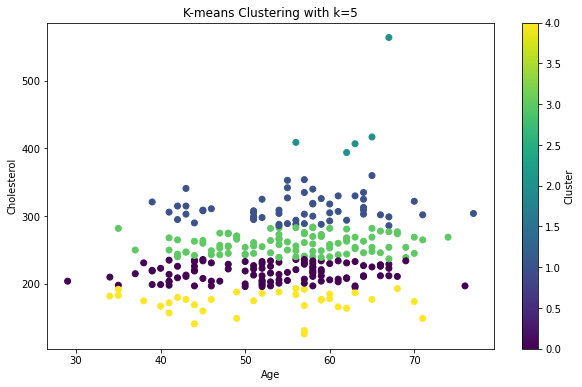

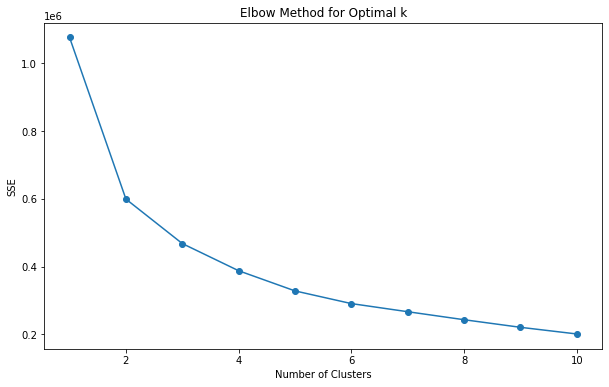

Optimal number of clusters (k): 3


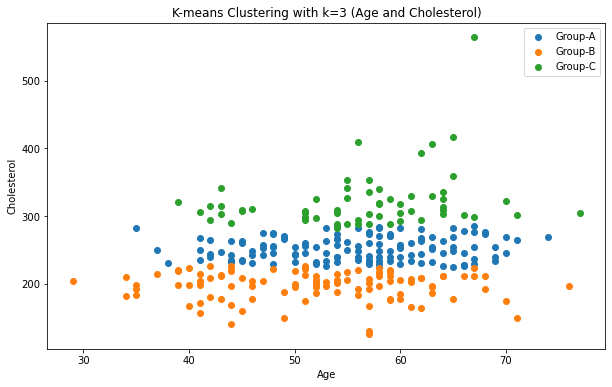

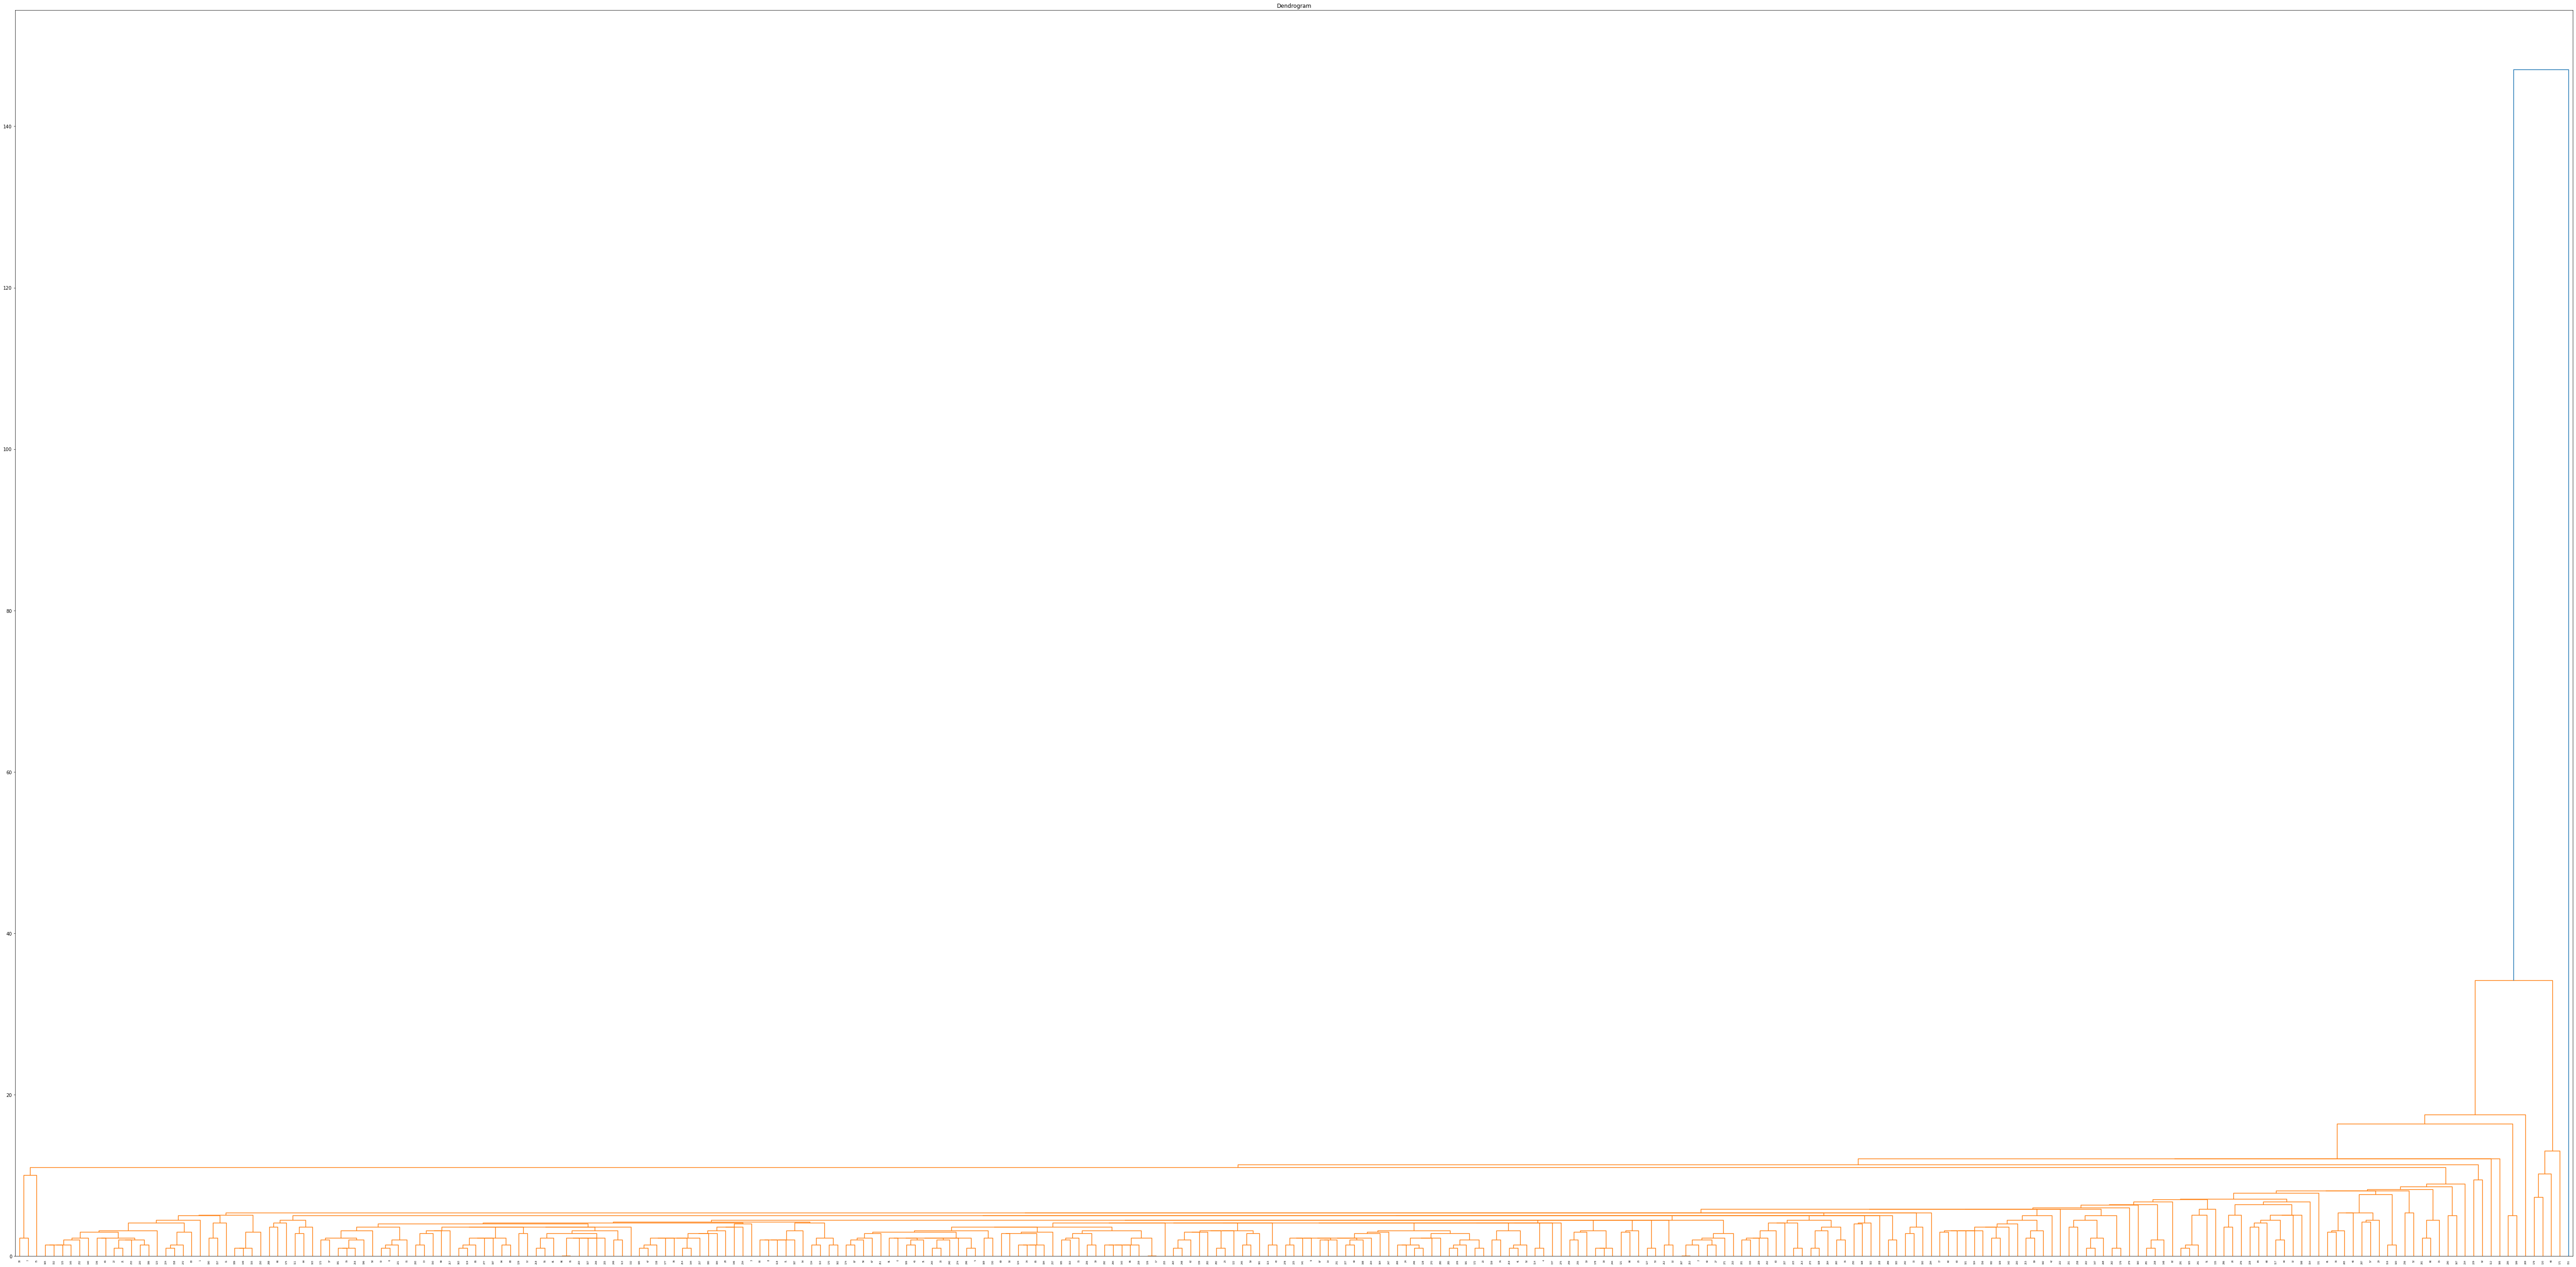

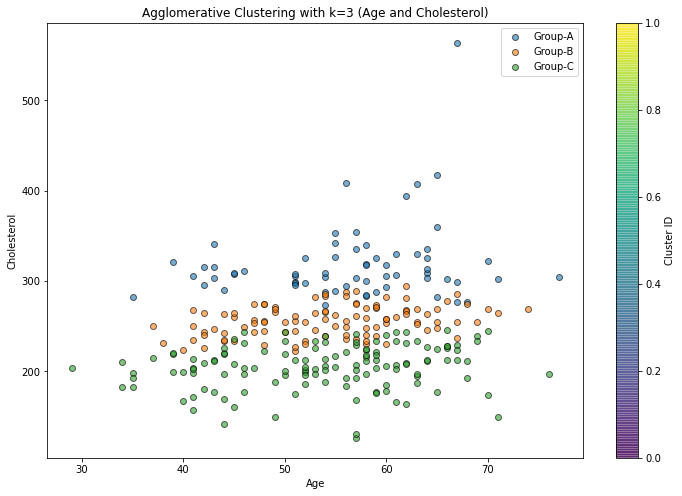

Silhouette Score for K-means: 0.2843841379026416
Silhouette Score for Agglomerative Clustering: 0.23920063180177092
Based on the Silhouette Scores, K-means clustering performs marginally better than Agglomerative Clustering in terms of cluster separation and coherence for this dataset.


In [9]:
import pandas as pd
from kneed import KneeLocator

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score



heart_disease_data = pd.read_csv('heart-disease-dataset.csv')

# Question 1: K-means Clustering with k=5 and Visualization
kmeans_5 = KMeans(n_clusters=5, random_state=0)
clusters_5 = kmeans_5.fit_predict(heart_disease_data[['age', 'chol']])
plt.figure(figsize=(10, 6))
plt.scatter(heart_disease_data['age'], heart_disease_data['chol'], c=clusters_5, cmap='viridis')
plt.title('K-means Clustering with k=5')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.colorbar(label='Cluster')
plt.show()



heart_disease_data = pd.read_csv('heart-disease-dataset.csv')  # Ensure the path is correct
heart_disease_data.replace('?', pd.NA, inplace=True)
heart_disease_data.dropna(inplace=True)  # Dropping rows with missing values for simplicity

for column in heart_disease_data.columns:
    heart_disease_data[column] = pd.to_numeric(heart_disease_data[column], errors='coerce')

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(heart_disease_data)
    sse.append(kmeans.inertia_)  # Append the SSE (inertia) for each k

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

knee_locator = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
print("Optimal number of clusters (k):", optimal_k)









kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
kmeans_optimal.fit(heart_disease_data)  # Fit the model using the entire dataset

clusters_optimal = kmeans_optimal.predict(heart_disease_data)

plt.figure(figsize=(10, 6))
cluster_labels = [f'Group-{chr(65+i)}' for i in range(optimal_k)]  # Generate labels like Group-A, Group-B, etc.

for i in range(optimal_k):
    cluster_data = heart_disease_data[clusters_optimal == i]
    plt.scatter(cluster_data['age'], cluster_data['chol'], label=cluster_labels[i])

plt.title(f'K-means Clustering with k={optimal_k} (Age and Cholesterol)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()


# Question 4: Dendrogram for Hierarchical Clustering
linked = linkage(heart_disease_data[['age', 'chol']], 'single')
plt.figure(figsize=(100, 50))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()



agglomerative = AgglomerativeClustering(n_clusters=optimal_k)
agglomerative.fit(heart_disease_data)

clusters_agglo = agglomerative.labels_

plt.figure(figsize=(12, 8))
cluster_labels = [f'Group-{chr(65+i)}' for i in range(optimal_k)]  # Generate labels like Group-A, Group-B, etc.

for i in range(optimal_k):
    cluster_data = heart_disease_data[clusters_agglo == i]
    plt.scatter(cluster_data['age'], cluster_data['chol'], label=cluster_labels[i], alpha=0.6, edgecolor='k')

plt.title(f'Agglomerative Clustering with k={optimal_k} (Age and Cholesterol)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.colorbar(label='Cluster ID')
plt.show()


# Question 6: Silhouette Score Comparison
silhouette_kmeans = silhouette_score(heart_disease_data, clusters)  # Use 'clusters' instead of 'clusters_optimal'
silhouette_agglo = silhouette_score(heart_disease_data, clusters_agglo)
print(f'Silhouette Score for K-means: {silhouette_kmeans}')
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agglo}')

# Determine which method performs better
if silhouette_kmeans > silhouette_agglo:
    print("Based on the Silhouette Scores, K-means clustering performs marginally better than Agglomerative Clustering in terms of cluster separation and coherence for this dataset.")
else:
    print("Based on the Silhouette Scores, Agglomerative Clustering performs marginally better than K-means clustering in terms of cluster separation and coherence for this dataset.")

